## Example to load the network, sample 4 levels at random from the latent space and then plot them using matplotlib.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!cp 'path/to/file' 'path/to/drive'

In [3]:
import os
os.chdir("drive/My Drive/exercise_DL_pcg")

In [4]:
!ls

all_levels_onehot.npz		   __pycache__	     train_vae.py
example_sampling_random_levels.py  readme.md	     Untitled.ipynb
models				   requirements.txt  vae_mario.py
plotting_utilities.py		   sprites


In [5]:
import os
import torch
import matplotlib.pyplot as plt

from vae_mario import VAEMario
from plotting_utilities import plot_decoded_level

In [6]:
# Loading the model
model_name = "mario_vae_zdim_2_overfitted"
z_dim = 2
vae = VAEMario(z_dim=z_dim)
vae.load_state_dict(torch.load(f"./models/{model_name}.pt"))


VAEMario(
  (encoder): Sequential(
    (0): Linear(in_features=2156, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2156, bias=True)
  )
)


<All keys matched successfully>

In [7]:
# Sampling random zs
zs = 2.5 * torch.randn((4, z_dim))

In [8]:
# Getting levels from them using the decoder
levels = vae.decode(zs)
# print(levels.shape)
level_imgs = [plot_decoded_level(level) for level in levels]


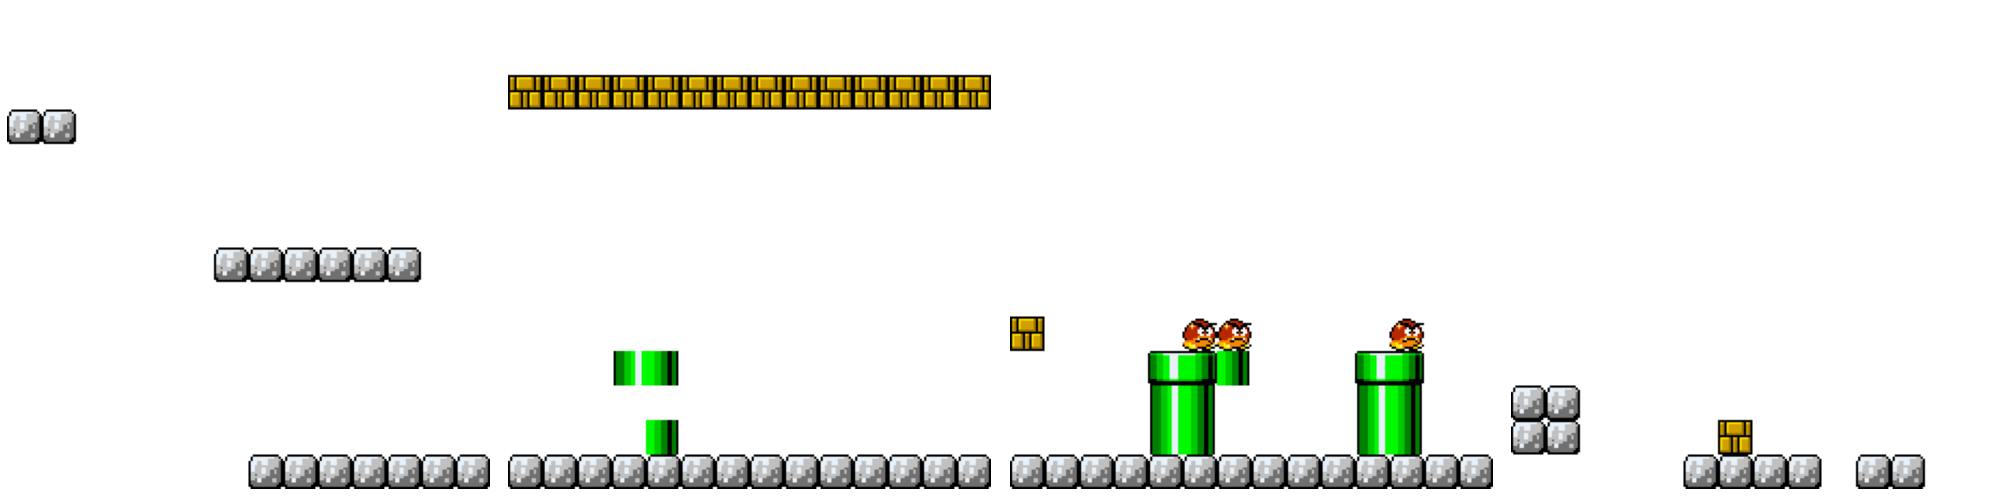

In [10]:
# Plotting
_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))
for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Latent Variable Evolution Lab


## Sample from the VAE and then implement some search algorithm of choise to search the latent space for a particular level (e.g. one with many ground tiles)